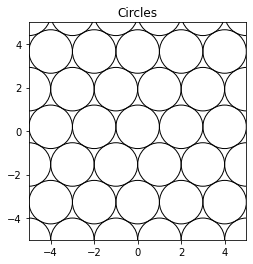

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

def DrawCircle(a,b,R):
    figure, axes = plt.subplots()
    xcenters=np.arange(a,b+R,2*R) #on a rajouté R à b pour être sûrs de voir des cercles partout. 
    ycenters=np.arange(a,b+1.732*R,2*1.732*R)#pareil pour a.
    for xcenter in xcenters:
        for ycenter in ycenters:
            circle = plt.Circle( (xcenter, ycenter ),R ,fill = False)
            circle2=plt.Circle( (xcenter+R, ycenter+1.732*R ),R ,fill = False )
            axes.add_artist(circle)
            axes.add_artist(circle2)
    plt.xlim(a,b)
    plt.ylim(a,b)

    axes.set_aspect( 1 )
    plt.title( 'Circles' )
    plt.show()

DrawCircle(-5,5,1)

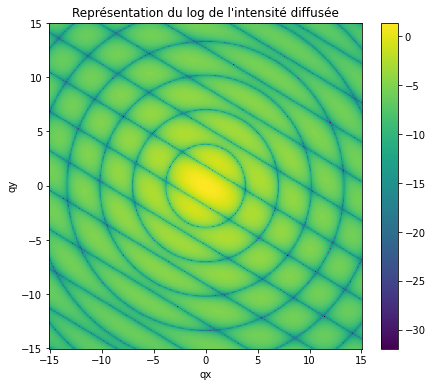

In [4]:
def CircleFormFactor(q,R):
    normq=np.sqrt(q[1]**2+q[0]**2)
    if (normq*R).any()==0:
        return 1
    else:
        return(2*sp.jv(1,normq*R)/(normq*R))



def calcul_I_maille(q,R):
    """
    RETOURNE : le calcul de l'intensité en q """
    X,Y=R,1.732*R #
    qx,qy=q[0],q[1]
    A1,A2=CircleFormFactor(q,R),CircleFormFactor(q,R)
    I=(np.abs(A1*np.exp(1J*(-qx*X-qy*Y)/2)+A2*np.exp(1J*(qx*X+qy*Y)/2)))**2
    return I 

def spectre_circle(R,dqx,dqy):
    """Som1,2 : array : tableau contenant les coordonnées des sommets des polygones
     dqx,y : integer : taille sur laquelle on calcule le spectre en x et y
     RETOURNE : le spectre de l'intensité"""
    
    Qx=np.linspace(-dqx,dqx,500)
    Qy=np.linspace(-dqy,dqy,500)

    qqx,qqy=np.meshgrid(Qx,Qy)

    plt.rcParams['figure.figsize']=[7,6]

    plt.pcolormesh(Qx,Qy,np.log(calcul_I_maille([qqx,qqy],R)),shading='auto')
    plt.colorbar()
    plt.xlabel('qx')
    plt.ylabel('qy')
    plt.title("Représentation du log de l'intensité diffusée")
    plt.show()

spectre_circle(1,15,15)

In [12]:
def Ireseau(q,Reseau):  #Motif : liste contenant les deux listes de sommets   // Reseau : liste contenant a, b (2 vecteurs) et N le nombre de motifs
    qx,qy=q[0],q[1]
    a,b,N=Reseau[0],Reseau[1],Reseau[2]
    ax,ay=a[0],a[1]
    bx,by=b[0],b[1]

    Freseau=np.sin((2*N+1)*qx*(ax+bx)*0.5)/np.sin(qx*(ax+bx)*0.5)*np.sin((2*N+1)*qy*(ay+by)*0.5)/np.sin(qy*(ay+by)*0.5)
    return(np.abs(Freseau)**2)

def Ireseaumaille(q,R,Reseau):
    qx,qy=q[0],q[1]
    return(calcul_I_maille([qx,qy],R)*Ireseau(q,Reseau))

In [10]:
def sature(I,e):
    nx,ny=np.shape(I)
    for i in range(nx):
        for j in range(ny):
            if I[i][j]>e:
                I[i][j]=e
    return(I)

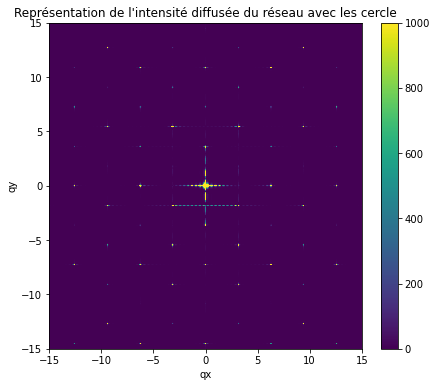

In [15]:
plt.rcParams['figure.figsize'] = [7,6]  
R=1
N=20
a,b=-15,15
Reseau=[[2*R,0],[0,2*1.732*R],N]
dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,5*1330)
Qy=np.linspace(-dqy,dqy,5*1330)

qqx,qqy=np.meshgrid(Qx,Qy)
I=sature(Ireseau([qqx,qqy],Reseau)*calcul_I_maille([qqx,qqy],R),1e3)
plt.pcolormesh(Qx,Qy,I,shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau avec les cercle")
plt.show()

In [8]:
plt.rcParams['figure.figsize'] = [7,6]  
R=1
N=20
a,b=-15,15
Reseau=[np.arange(a,b,2*R),np.arange(a,b,2*np.sqrt(3)*R),N]
dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,13300)
Qy=np.linspace(-dqy,dqy,13300)

qqx,qqy=np.meshgrid(Qx,Qy)
I=sature(Ireseau([qqx,qqy],Reseau)*calcul_I_maille([qqx,qqy],R),5e2)
plt.pcolormesh(Qx,Qy,I,shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau en log")
plt.show()

KeyboardInterrupt: 